In [28]:
# Gain modulation RNN with oja learning on weight matrix
import numpy as np
import sys
sys.path.append("..")
from rnn_wt import RNN
import matplotlib.pyplot as plt
import json
import torch
import seaborn as sns

## Loading Trained Weights

In [29]:
with open('../weights/sinwave_wt_60_nodes/weight_history.json') as f:
    weight_history = json.load(f)

In [30]:
weight_history.keys()

dict_keys(['trained gain', 'trained shift', 'trained weights', 'connectivity matrix', 'input weights', 'output weights', 'losses', 'init_weight'])

In [31]:
gains = np.array(weight_history['trained gain'])
shifts = np.array(weight_history['trained shift'])
weight_matrix = np.array(weight_history['trained weights'])
connectivity_matrix = np.array(weight_history['connectivity matrix'])
input_weight_matrix = np.array(weight_history['input weights'])
output_weight_matrix = np.array(weight_history['output weights'])
losses = np.array(weight_history['losses'])

# test oja
# weight_sums = np.array(weight_history['weight_sums'])
# gain_changes = np.array(weight_history['gain_changes'])

In [32]:
input_weight_matrix

array([[-0.09881884, -0.27014897,  1.74506844, -0.18055798, -0.20237778,
        -0.39255649,  2.14640218,  2.13640549,  0.97422963, -0.18978997,
        -0.66284785,  0.41396654,  0.03192483, -1.59365932,  1.14381446,
        -0.50953679,  0.64879469, -0.11862901, -0.07282092, -1.34342947,
        -0.88004547, -0.65366244, -0.0220128 ,  0.33829981, -0.28875506,
        -0.76208711,  1.05316616, -0.00918505,  0.47576038,  0.37394337,
        -0.87926356, -0.63884774,  0.85558682,  1.9557536 ,  0.47329157,
        -0.67508266,  1.22850526, -1.64202033, -0.84033206,  1.27104823,
        -0.42630757,  1.51382241, -1.71669457, -0.65708336,  0.33403441,
         0.19305897,  0.27807979, -0.03249054, -0.62663497,  0.99419774,
        -0.66385739, -1.25602582, -0.11064557, -2.57159147,  0.83099527,
         0.49112729, -0.07335342, -0.68921409, -1.80830522, -1.72443367]])

In [33]:
output_weight_matrix

array([[ 0.09982234, -0.09689204,  0.07791864,  0.09728579,  0.00344811,
         0.11038695,  0.00967581, -0.27298553, -0.00817783, -0.10167182,
        -0.0423162 ,  0.05012216, -0.18011036,  0.04777387,  0.12876838,
        -0.15966175, -0.1441136 ,  0.08717316, -0.00289854, -0.11245045,
        -0.03710751, -0.09839764, -0.13823008,  0.17772495,  0.18741622,
         0.01394401, -0.0893594 ,  0.14802223, -0.07331952,  0.05472156,
        -0.09541939,  0.01394179,  0.07543048,  0.0133185 , -0.15709142,
        -0.0218053 ,  0.1083294 , -0.16522878, -0.05994373,  0.0522554 ,
        -0.06693201,  0.13604284, -0.08199663, -0.01798499,  0.07283428,
         0.09913663, -0.16309895,  0.03336806, -0.20397939, -0.00087581,
         0.35984682, -0.05243149,  0.02417362, -0.17170608,  0.03363602,
        -0.17887233, -0.03723494,  0.04252019,  0.11537365,  0.03990114]])

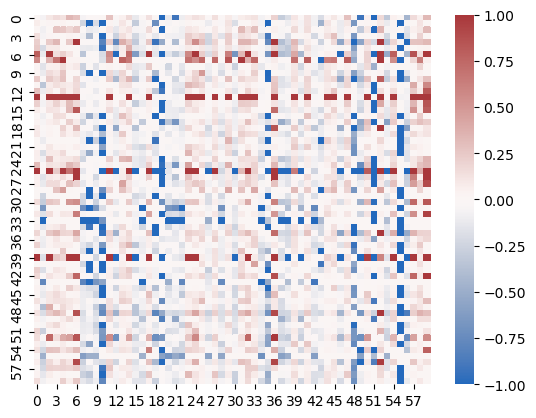

In [34]:
sns.heatmap(weight_matrix, vmax=1, vmin=-1, cmap='vlag')

## Defining Network

In [35]:
time_constant = 100 #ms
timestep = 10 #ms
time = 3000 #ms
num_inputs = 1
num_nodes = 60
init_activations = np.zeros((num_nodes, 1))

network = RNN(weight_matrix, connectivity_matrix, init_activations, gains, shifts, input_weight_matrix, output_weight_matrix, 
                time_constant = time_constant, timestep = timestep)

100%|██████████| 300/300 [00:00<00:00, 14438.72it/s]


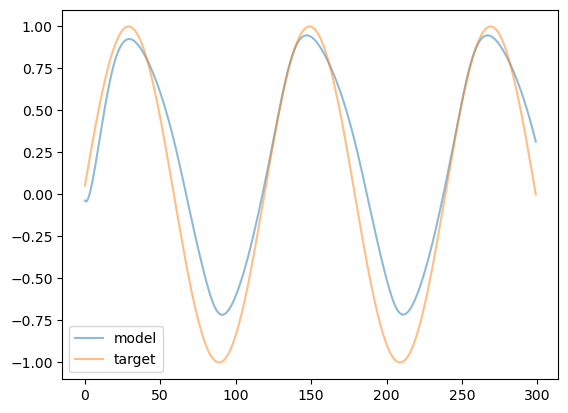

In [36]:
time_points = np.arange(300).reshape(-1, 1)
# inputs = (1 + np.sin(time_points/60*np.pi))/2
# targets = (1 + np.sin((time_points+1)/60*np.pi))/2
inputs = np.sin(time_points/60*np.pi)
targets = np.sin((time_points+1)/60*np.pi)
inputs = inputs.reshape(-1, 1)
targets = targets.reshape(-1, 1)

outputs, activations = network.simulate(time, torch.tensor(inputs).float())
fig, ax = plt.subplots()
plt.plot(time_points, outputs.detach().numpy(), alpha=0.5, label='model')
# plt.plot(time_points, inputs)
plt.plot(time_points, targets, alpha=0.5, label='target')
plt.legend()
# plt.savefig("fig/sin_oja_train.png")

100%|██████████| 300/300 [00:00<00:00, 14349.64it/s]


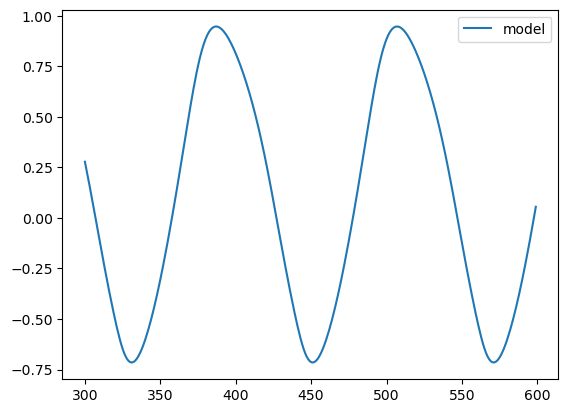

In [37]:
time_pred = 3000

time_points_pred = np.arange(300,600).reshape(-1, 1)
# inputs_pred = (1 + np.sin(time_points_pred/60*np.pi))/2
inputs_pred = np.sin(time_points_pred/60*np.pi)

outputs_pred, activations_pred = network.simulate(time_pred, torch.tensor(inputs_pred).float())
fig, ax = plt.subplots()
plt.plot(time_points_pred, outputs_pred.detach().numpy(), label='model')
plt.legend()
# plt.savefig("fig/sin_oja_pred.png")

(0.0, 0.5)

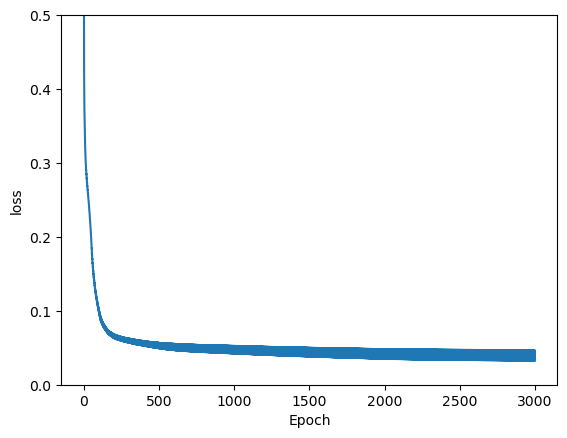

In [38]:
plt.plot(np.arange(len(losses)), losses)
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.ylim([0,0.5])
# plt.savefig("fig/sin_oja_loss.png")

In [39]:
# plt.plot(np.arange(len(weight_sums)), weight_sums)
# plt.xlabel("Epoch")
# plt.ylabel("weight sums")
# # plt.ylim([0,0.5])
# # plt.savefig("fig/sin_oja_weightsum.png")

In [40]:
# plt.plot(np.arange(len(gain_changes)), gain_changes)
# plt.xlabel("Epoch")
# plt.ylabel("gain changes")
# # plt.ylim([0,0.5])
# # plt.savefig("fig/sin_oja_gainchange.png")